In [37]:
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.9.0'


### Hypothesis and Cost     



### Hypothesis    



$ \Large 
H(x) = Wx +b \\
$
### Cost      


$ \Large
cost(W) = \Large \frac{1}{m} \sum_{i=1}^{n} (Wx^i - y^i)^2
$

In [2]:
# cost는 error의 제곱에 대한 평균값임
# cost가 최소화되는 w와 b값을 구함, 이것이 학습 learning임
# wx 예측, y 실제값, 이들의 차이가 cost
# w에 따라서 cost가 달라짐, 결국 cost를 최소화하는 w를 찾게됨

In [3]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

### Hypothesis

In [4]:
W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [5]:
hypothesis

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)>

In [6]:
# 예상하는 값, W=1, b=0
# 임의의 값으로 w, b를 지정
# 

In [7]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [8]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

In [9]:
y_data

[1, 2, 3, 4, 5]

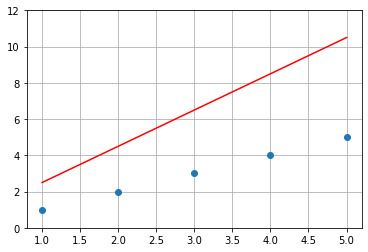

In [10]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.ylim(0, 12)
plt.savefig("figure105_01.png", dpi=150, bbox_inches='tight')
plt.show()

### Cost

$ \Large
cost(W) = \Large \frac{1}{m} \sum_{i=1}^{n} (Wx^i - y^i)^2
$

In [11]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [12]:
cost.numpy()

14.25

In [13]:
#W = tf.Variable(tf.random.normal([1]), name='weight')
#b = tf.Variable(tf.random.normal([1]), name='bias')

#hypothesis = W * x_data + b

In [14]:
#W

In [15]:
#b

GradientDescent 방법

In [16]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

In [17]:
W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [18]:
x_data

[1, 2, 3, 4, 5]

In [19]:
# hypothesis를 설명
# cost 합수설명
# gradient 기울기

In [20]:
v =[1., 2., 3., 4.]
mean = tf.reduce_mean(v) # 2.5

In [21]:
mean.numpy()

2.5

In [22]:
sqrt = tf.square(3)

In [23]:
sqrt.numpy()

9

In [24]:
# Grddient Descent : 경사하강법# 
# tf.GrdientTape()를 태입에 기록한다.
# w,b에 대한 미분값을 반환한다.


In [25]:
W_grad

<tf.Tensor: shape=(), dtype=float32, numpy=25.0>

In [26]:
W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [27]:
W - 0.1 * W_grad

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5>

In [28]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

In [29]:
# assign 함수 : learning rate를 반영
# 

In [30]:
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

In [31]:
W.numpy()

array([1.3202076], dtype=float32)

In [32]:
b.numpy()

array([-0.5781891], dtype=float32)

In [39]:
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

learning_rate = tf.Variable(0.01)

for i in range(1001):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    
    if i % 200 == 0:
        print("실행횟수 : {:5} | cost : {:10.6f} | W : {:10.6f}| b : {:10.6f} ".format(i, cost.numpy(), float(W.numpy()), float(b.numpy()) ))


실행횟수 :     0 | cost :   0.633835 | W :   0.514335| b :   1.847571 
실행횟수 :   200 | cost :   0.160239 | W :   0.740993| b :   0.935097 
실행횟수 :   400 | cost :   0.041347 | W :   0.868433| b :   0.474999 
실행횟수 :   600 | cost :   0.010669 | W :   0.933168| b :   0.241284 
실행횟수 :   800 | cost :   0.002753 | W :   0.966052| b :   0.122564 
실행횟수 :  1000 | cost :   0.000710 | W :   0.982755| b :   0.062259 


In [40]:
W.shape

TensorShape([1])

In [41]:
cost

<tf.Tensor: shape=(), dtype=float32, numpy=0.00071031525>

In [42]:
b.numpy()

array([0.06225858], dtype=float32)

In [43]:
W

<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([0.98275536], dtype=float32)>

In [44]:
x_data

[1, 2, 3, 4, 5]

In [45]:
y_data

[1, 2, 3, 4, 5]

In [46]:
hypothesis.numpy()

array([1.0451667, 2.0278635, 3.0105603, 3.9932573, 4.9759545],
      dtype=float32)

In [28]:
# cost가 작으면 작을 수록 좋다. 
# 모델이 실제값을 예측하는데 잘 맞게 되었다.

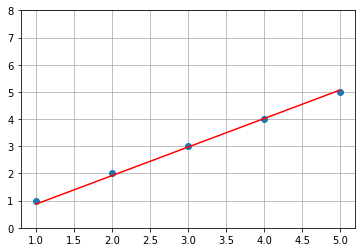

In [81]:
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.grid()
plt.ylim(0, 8)
plt.savefig("figure105_02.png", dpi=150, bbox_inches='tight')
plt.show()

In [30]:
W.numpy(), b.numpy()

(array([1.0000015], dtype=float32), array([-4.589438e-06], dtype=float32))

In [31]:
### 예측

In [32]:
# predict
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor([5.000003], shape=(1,), dtype=float32)
tf.Tensor([2.4999993], shape=(1,), dtype=float32)
